# Machine Learning for Classification

## 3.1 Churn Prediction Project

**Binary classification** 

$$y_i = g(x_i)$$

$y_i \in {0, 1}$ i.e. 0 - Churn, 1 - No Churn

In [1]:
import os

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## 3.2 Data Preparation

In [32]:
TELCO_CHURN_DATASET = "./dataset/telco_customer_churn.csv"
telco_churn_df = pd.read_csv(TELCO_CHURN_DATASET)

In [33]:
telco_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
print(telco_churn_df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [35]:
print(telco_churn_df.shape)

(7043, 21)


In [36]:
telco_churn_df.head().T 

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [37]:
telco_churn_df.columns = telco_churn_df.columns.str.lower().str.replace(" ", "_")

In [38]:
categorical_columns = list(telco_churn_df.dtypes[telco_churn_df.dtypes == "object"].index)

In [39]:
for c in categorical_columns:
    telco_churn_df[c] = telco_churn_df[c].str.lower().str.replace(" ", "_")

In [40]:
print(categorical_columns)

['customerid', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges', 'churn']


In [41]:
telco_churn_df.head().T 

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [42]:
tc = pd.to_numeric(telco_churn_df.totalcharges, errors="coerce")

In [43]:
tc.isnull().sum()

11

In [44]:
telco_churn_df["totalcharges"] = pd.to_numeric(telco_churn_df["totalcharges"], errors="coerce")
telco_churn_df["totalcharges"] = telco_churn_df["totalcharges"].fillna(0)

In [45]:
telco_churn_df["totalcharges"].isnull().sum()

0

In [46]:
telco_churn_df["totalcharges"].dtype 

dtype('float64')

In [47]:
telco_churn_df["churn"] = (telco_churn_df["churn"].str.lower() == "yes").astype(int)

In [48]:
telco_churn_df["churn"].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

## 3.3 Setting up the Validation Framework

Split the dataset into training, testing, and validation sets

In [49]:
from sklearn.model_selection import train_test_split 

In [60]:
df_full_train, df_test = train_test_split(telco_churn_df, test_size=0.2, random_state=42)

In [61]:
len(df_full_train), len(df_test)

(5634, 1409)

In [62]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [63]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [64]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

In [65]:
y_train = df_train.churn.values 
y_val = df_val.churn.values 
y_test = df_test.churn.values 

In [66]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## 3.4 Exploratory Data Analysis (EDA)

In [67]:
df_full_train = df_full_train.reset_index(drop=True)

In [69]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.734469
1    0.265531
Name: proportion, dtype: float64

In [70]:
global_churn_rate = df_full_train.churn.mean()
print(round(global_churn_rate, 2))

0.27


In [71]:
df_full_train.dtypes 

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [79]:
numerical_columns = df_full_train.select_dtypes(include=["number"]).columns 
print(numerical_columns)

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')


In [81]:
categorical_columns = df_full_train.select_dtypes(include=["object"]).columns
print(categorical_columns)

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')


In [82]:
df_full_train[categorical_columns].nunique()

customerid          5634
gender                 2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

In [84]:
df_full_train[numerical_columns].describe().T 

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5634.0,0.160809,0.367388,0.00,0.000,0.000,0.0000,1.0
tenure,5634.0,32.373092,24.424539,0.00,9.000,29.000,55.0000,72.0
monthlycharges,5634.0,64.864253,30.089324,18.25,35.750,70.525,89.9375,118.6
totalcharges,5634.0,2287.087948,2263.197899,0.00,406.275,1405.650,3806.6125,8684.8
churn,5634.0,0.265531,0.441655,0.00,0.000,0.000,1.0000,1.0


## 3.5 Feature Importance - Churn Rate and Risk Ratio

How to measure feature importance:
1. Difference: difference between the global churn rate and the churn rate of a particular group.
2. Risk ratio:
$$RISK = \cfrac{\text{Group churn rate}}{\text{Global churn rate}}$$

If $RISK > 1$, more likely to churn, else the group is less likely to churn. 

In [85]:
# Churn rate for males and females 
churn_female = df_full_train[df_full_train["gender"] == "female"].churn.mean()
churn_female 

0.2708409173643975

In [86]:
churn_male = df_full_train[df_full_train["gender"] == "male"].churn.mean()
churn_male 

0.26047800484932454

In [87]:
df_full_train.partner.value_counts()

partner
no     2904
yes    2730
Name: count, dtype: int64

In [88]:
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_partner 

0.20073260073260074

In [91]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner 

0.32644628099173556

In [95]:
df_group = df_full_train.groupby("gender").churn.agg(["mean", "count"])
df_group["diff"] = df_group["mean"] - global_churn_rate  
df_group["risk"] = df_group["mean"] / global_churn_rate 
df_group 

,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971


In [97]:
from IPython.display import display 

for c in categorical_columns:
    print(f"Column: {c}")
    df_group = df_full_train.groupby(c).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_churn_rate  
    df_group["risk"] = df_group["mean"] / global_churn_rate 
    display(df_group)
    print("\n") 

Column: customerid


,mean,count,diff,risk
customerid,,,,
0002-orfbo,0.0,1,-0.265531,0.000000
0003-mknfe,0.0,1,-0.265531,0.000000
0004-tlhlj,1.0,1,0.734469,3.766043
0011-igkff,1.0,1,0.734469,3.766043
0013-exchz,1.0,1,0.734469,3.766043
...,...,...,...,...
9986-bonce,1.0,1,0.734469,3.766043
9987-lutyd,0.0,1,-0.265531,0.000000
9992-rramn,1.0,1,0.734469,3.766043




Column: gender


,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971




Column: partner


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968




Column: dependents


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276




Column: phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871




Column: multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952




Column: internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502




Column: onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363




Column: onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467




Column: deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234




Column: techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657




Column: streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841




Column: streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784




Column: contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878




Column: paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164




Column: paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


## 3.6 Feature Importance - Mutual Information

- Mutual information is a concept from information theory. It tells us how much we can learn about one variable if we know the value of another. 

- It is a measure of mutual dependence between two variables.

- We can use this to quantitatively measure feature importance for categorical columns.

In [98]:
from sklearn.metrics import mutual_info_score 

In [99]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0966515250997

In [100]:
# Low mutual dependence
mutual_info_score(df_full_train.gender, df_full_train.churn)

6.877785208564413e-05

In [101]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0966515250997

In [102]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.010227084558171867

In [103]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [105]:
mutual_info_scores = df_full_train[categorical_columns].apply(mutual_info_churn_score)
mutual_info_scores.sort_values(ascending=False)

customerid          0.578763
contract            0.096652
onlinesecurity      0.063393
techsupport         0.060935
internetservice     0.053313
onlinebackup        0.045424
paymentmethod       0.042861
deviceprotection    0.042007
streamingtv         0.030844
streamingmovies     0.030705
paperlessbilling    0.019077
dependents          0.014129
partner             0.010227
multiplelines       0.000654
gender              0.000069
phoneservice        0.000040
dtype: float64

## 3.7 Feature Importance: Correlation

- Used to measure the feature importance for numerical columns
- Involves computing the correlation coefficient between the columns
- Correlation coefficient is high when the increase/decrease in one variable leads to a corresponding increase/decrease in the other variable.
- Low correlation coefficient implies that the variable does not really affect the target variable.

In [106]:
df_full_train[numerical_columns].corrwith(df_full_train.churn)

seniorcitizen     0.147078
tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
churn             1.000000
dtype: float64

## 3.8 One-Hot Encoding
- Using scikit-learn to encode numerical variables

In [108]:
from sklearn.feature_extraction import DictVectorizer 

In [125]:
numerical_columns = ['tenure', 'monthlycharges', 'totalcharges']
categorical_columns = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [126]:
train_dicts = df_train[[*categorical_columns, *numerical_columns]].to_dict(orient="records")

In [127]:
train_dicts

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'month-to-month',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 3,
  'monthlycharges': 19.85,
  'totalcharges': 64.55},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(autom

In [128]:
dv = DictVectorizer(sparse=False)

In [132]:
X_train = dv.fit_transform(train_dicts)

In [133]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [134]:
X_train.shape 

(4225, 45)

In [135]:
val_dicts = df_val[[*categorical_columns, *numerical_columns]].to_dict(orient="records")

In [136]:
X_val = dv.transform(val_dicts)

In [137]:
X_val.shape 

(1409, 45)

## 3.9 Logistic Regression 
- Logistic regression is used for training binary classification models 

- Sigmoid function is used to convert the score into a probability, between 0 and 1

- Linear regression and Logistic regression models are called linear models.

In [188]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [139]:
z = np.linspace(-5, 5, 51)

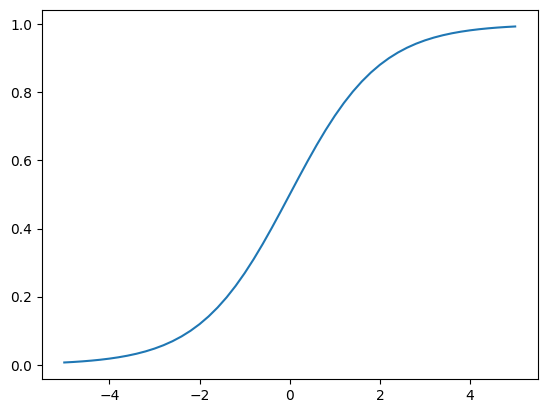

In [140]:
plt.plot(z, sigmoid(z))

In [141]:
def logistic_regression(xi):
    score = w0 

    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result 

## 3.10 Training LogisticRegression using scikit-learn

In [142]:
from sklearn.linear_model import LogisticRegression 

In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
model.coef_

array([[ 5.47271292e-01, -2.06102517e-01, -4.68364255e-01,
        -5.20657837e-02, -7.51296956e-02,  3.53257442e-02,
        -1.14895695e-01, -4.76255281e-02,  2.67409433e-02,
        -1.53936423e-01, -3.04418720e-01,  2.92118936e-01,
        -1.14895695e-01,  2.12952508e-03, -2.14884833e-01,
         1.22799975e-01, -3.51106213e-02,  8.78086881e-02,
        -1.14895695e-01, -1.00108472e-01,  2.37232180e-01,
        -1.14895695e-01, -2.49531964e-01, -2.34476749e-01,
         1.07281270e-01, -1.03748160e-01, -2.34473192e-02,
        -1.11508898e-01, -1.80667635e-01,  2.53939289e-01,
        -8.89582357e-02,  1.22799975e-01, -2.49995455e-01,
         1.75774830e-01, -1.50074038e-01, -1.14895695e-01,
         1.37774254e-01, -6.56536749e-02, -1.14895695e-01,
         5.33538910e-02,  2.01412046e-01, -1.14895695e-01,
        -2.13711830e-01, -5.96844375e-02,  2.98039147e-04]])

In [145]:
model.intercept_

array([-0.12890317])

In [150]:
# Hard predictions
preds = model.predict(X_train)
print(len(preds))
preds[preds == 1].sum()

4225


929

In [158]:
# Soft predictions: returns the probability of the predictons 
y_val_pred = model.predict_proba(X_val)[:, 1]

In [159]:
y_val_pred 

array([0.14596107, 0.2454397 , 0.41114365, ..., 0.71831399, 0.0584708 ,
       0.03191079])

In [160]:
churn_decision = (y_val_pred >= 0.5).astype("int")

In [161]:
churn_decision

array([0, 0, 0, ..., 1, 0, 0])

In [162]:
# Evaluating the performance using accuracy
(y_val == churn_decision).mean()

0.801277501774308

In [174]:
val_df_pred = df_val[["customerid"]].copy()
val_df_pred["probability"] = y_val_pred 
val_df_pred["prediction"] = churn_decision 
val_df_pred["actual"] = y_val 
val_df_pred.head()

,customerid,probability,prediction,actual
0,9501-ukknl,0.145961,0,0
1,0060-fualy,0.245440,0,0
2,2951-qoqtk,0.411144,0,1
3,0337-cnpze,0.560501,1,1
4,5862-brixz,0.049465,0,0


In [175]:
val_df_pred["correct"] = val_df_pred["prediction"] == val_df_pred["actual"]
val_df_pred.head()

,customerid,probability,prediction,actual,correct
0,9501-ukknl,0.145961,0,0,True
1,0060-fualy,0.245440,0,0,True
2,2951-qoqtk,0.411144,0,1,False
3,0337-cnpze,0.560501,1,1,True
4,5862-brixz,0.049465,0,0,True


In [176]:
val_df_pred["correct"].mean()

0.801277501774308

In [168]:
df_val[["customerid"]]

,customerid
0,9501-ukknl
1,0060-fualy
2,2951-qoqtk
3,0337-cnpze
4,5862-brixz
...,...
1404,5294-cdgwy
1405,6891-jpyff
1406,1031-iideo
1407,7037-mtyvw


## 3.11 Model Interpretation

- Interpreting the coefficients and intercept of the developed model.

- Train a smaller model with fewer features

In [177]:
# Get the weight of each feature for the first sample
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.547,
 'contract=one_year': -0.206,
 'contract=two_year': -0.468,
 'dependents=no': -0.052,
 'dependents=yes': -0.075,
 'deviceprotection=no': 0.035,
 'deviceprotection=no_internet_service': -0.115,
 'deviceprotection=yes': -0.048,
 'gender=female': 0.027,
 'gender=male': -0.154,
 'internetservice=dsl': -0.304,
 'internetservice=fiber_optic': 0.292,
 'internetservice=no': -0.115,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.215,
 'multiplelines=no_phone_service': 0.123,
 'multiplelines=yes': -0.035,
 'onlinebackup=no': 0.088,
 'onlinebackup=no_internet_service': -0.115,
 'onlinebackup=yes': -0.1,
 'onlinesecurity=no': 0.237,
 'onlinesecurity=no_internet_service': -0.115,
 'onlinesecurity=yes': -0.25,
 'paperlessbilling=no': -0.234,
 'paperlessbilling=yes': 0.107,
 'partner=no': -0.104,
 'partner=yes': -0.023,
 'paymentmethod=bank_transfer_(automatic)': -0.112,
 'paymentmethod=credit_card_(automatic)': -0.181,
 'paymentmethod=electronic_check': 0.254,
 

In [178]:
small = ['contract', 'tenure', 'monthlycharges']

df_train[small].iloc[:10].to_dict(orient="records")

[{'contract': 'month-to-month', 'tenure': 3, 'monthlycharges': 19.85},
 {'contract': 'one_year', 'tenure': 55, 'monthlycharges': 103.7},
 {'contract': 'month-to-month', 'tenure': 24, 'monthlycharges': 49.7},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 20.2},
 {'contract': 'two_year', 'tenure': 61, 'monthlycharges': 62.15},
 {'contract': 'two_year', 'tenure': 42, 'monthlycharges': 20.7},
 {'contract': 'month-to-month', 'tenure': 23, 'monthlycharges': 54.15},
 {'contract': 'month-to-month', 'tenure': 37, 'monthlycharges': 98.8},
 {'contract': 'one_year', 'tenure': 43, 'monthlycharges': 20.0},
 {'contract': 'month-to-month', 'tenure': 20, 'monthlycharges': 73.65}]

In [179]:
dicts_train_small = df_train[small].to_dict(orient="records")
dicts_val_small = df_val[small].to_dict(orient="records")

In [180]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [181]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [182]:
X_train_small = dv_small.transform(dicts_train_small)

In [183]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [184]:
w0 = model_small.intercept_[0]
w0 

-2.5621298518105196

In [185]:
w = model_small.coef_[0]
w.round(3)

array([ 1.063, -0.029, -1.035,  0.027, -0.036])

In [186]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 1.063,
 'contract=one_year': -0.029,
 'contract=two_year': -1.035,
 'monthlycharges': 0.027,
 'tenure': -0.036}

People with yearly contracts churn more while people with monthly contracts churn less.

In [190]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036))

0.41824062315816374

## 3.13 Using the Model

In [193]:
dicts_full_train = df_full_train[categorical_columns + numerical_columns].to_dict(orient="records")
print(dicts_full_train[:3])

[{'gender': 'female', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'yes', 'phoneservice': 'yes', 'multiplelines': 'no', 'internetservice': 'dsl', 'onlinesecurity': 'yes', 'onlinebackup': 'no', 'deviceprotection': 'yes', 'techsupport': 'no', 'streamingtv': 'no', 'streamingmovies': 'yes', 'contract': 'one_year', 'paperlessbilling': 'no', 'paymentmethod': 'mailed_check', 'tenure': 21, 'monthlycharges': 64.85, 'totalcharges': 1336.8}, {'gender': 'female', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'phoneservice': 'yes', 'multiplelines': 'yes', 'internetservice': 'fiber_optic', 'onlinesecurity': 'no', 'onlinebackup': 'yes', 'deviceprotection': 'no', 'techsupport': 'no', 'streamingtv': 'yes', 'streamingmovies': 'yes', 'contract': 'two_year', 'paperlessbilling': 'yes', 'paymentmethod': 'bank_transfer_(automatic)', 'tenure': 54, 'monthlycharges': 97.2, 'totalcharges': 5129.45}, {'gender': 'male', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'no', 'phoneservice': 'no'

In [194]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [195]:
y_full_train = df_full_train.churn.values 

In [196]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [197]:
dicts_test = df_test[categorical_columns + numerical_columns].to_dict(orient="records")

In [205]:
X_test = dv.transform(dicts_test)

In [206]:
y_test_pred = model.predict_proba(X_test)[:, 1]

In [207]:
churn_decision = (y_test_pred >= 0.5)

In [214]:
(churn_decision == y_test).mean()

0.803076923076923

We always want to ensure that the difference between the accuracy of the validation set and the test set is not too large.

In [215]:
# Testing for a single customer 
customer = dicts_test[10]
customer 

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 2,
 'monthlycharges': 69.8,
 'totalcharges': 134.7}

In [218]:
X_customer = dv.transform([customer])

In [220]:
X_customer.shape 

(1, 45)

In [222]:
model.predict_proba(X_customer)[0, 1]

0.6070409921799924

In [223]:
y_test[10]

1

## 3.13 Summary
- We built a churn prediction model to predict if a customer is going to churn based on a number of features and decide whether to send a promotional email or not based on that prediction.

- First, we started with data preparation
- Then, exploratory data analysis
- Then, data cleaning
- Then, we set up the validation framework
- Then, determining feature importance using risk ratio, mutual information (for categorical variables) and correlation (for numerical variables)
- One-hot encoding to encoding categorical variables
- Building the model using LogisticRegression
- Training the Logistic Regression model
- Testing the model and evaluating its performance
- Using the model